In [52]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [53]:
df=pd.read_csv("framingham.csv")
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70,0
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103,1
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1,1,0,0,1,0,313,179.0,92.0,25.97,66,86,1
4234,1,51,3,1,43,0,0,0,0,207,126.5,80.0,19.71,65,68,0
4235,0,48,2,1,20,0,0,0,0,248,131.0,72.0,22.00,84,86,0
4236,0,44,1,1,15,0,0,0,0,210,126.5,87.0,19.16,86,0,0


In [54]:
x=df.drop('TenYearCHD',axis=1)
y=df["TenYearCHD"]

In [55]:
x

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77
1,0,46,2,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76
2,1,48,1,1,20,0,0,0,0,245,127.5,80.0,25.34,75,70
3,0,61,3,1,30,0,0,1,0,225,150.0,95.0,28.58,65,103
4,0,46,3,1,23,0,0,0,0,285,130.0,84.0,23.10,85,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1,1,0,0,1,0,313,179.0,92.0,25.97,66,86
4234,1,51,3,1,43,0,0,0,0,207,126.5,80.0,19.71,65,68
4235,0,48,2,1,20,0,0,0,0,248,131.0,72.0,22.00,84,86
4236,0,44,1,1,15,0,0,0,0,210,126.5,87.0,19.16,86,0


In [56]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=27)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (3390, 15) (3390,)
Test set: (848, 15) (848,)


In [58]:
model = LogisticRegression()

In [59]:
model.fit(x_train,y_train)

C:\Users\Aiyush\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:

y_pred=model.predict(x_test)

In [80]:
#fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 

#random_probs = [0 for i in range(len(y_test))]
#p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[718,   4],
       [120,   6]], dtype=int64)

In [81]:
#auc_score = roc_auc_score(y_test, pred_prob[:,1])
#print("AUC score = ", auc_score)
from sklearn.metrics import accuracy_score
print('Accuracy =' ,accuracy_score(y_test,y_pred))

Accuracy = 0.8537735849056604


C:\Users\Aiyush\AppData\Local\Temp\ipykernel_17692\341508409.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


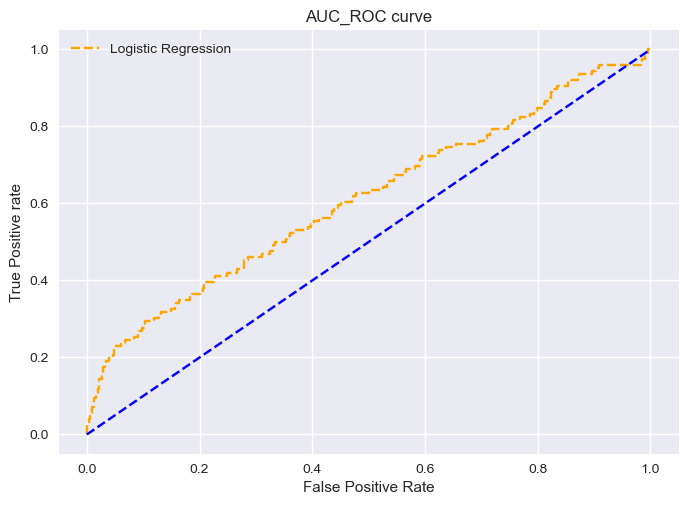

In [82]:
plt.style.use('seaborn')


plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('AUC_ROC curve')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();